In [1]:
import glob
import os 
from os import walk
import matplotlib.pyplot as plt
import pandas as pd

#train_folder = "/nas/home/fronchini/EUSIPCO/acoustic-event-detection/AudioEventDataset/train"
dataset_folder = "/nas/home/fronchini/EUSIPCO/urban-sound-class/UrbanSound8K/metadata"
audio_folder = "/nas/home/fronchini/EUSIPCO/urban-sound-class/UrbanSound8K/audio"
metadata_file = os.path.join(dataset_folder, "UrbanSound8K.csv")
print(metadata_file)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    'font.size': 20})

/nas/home/fronchini/EUSIPCO/urban-sound-class/UrbanSound8K/metadata/UrbanSound8K.csv


In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(metadata_file, index_col=False)

# Display the DataFrame
print("Total number of files")
print(df.head())

Total number of files
      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


Distribution of the training set

In [3]:
# Display the distribution of the 'class' column
class_distribution = df['class'].value_counts()

# Print the result
print("Class Distribution:")
print(class_distribution)

# Get the sum of occurrences for each class
class_sum = class_distribution.sum()

# Print the sum of occurrences for all classes
print(f"\nSum of Class Occurrences: {class_sum}")


Class Distribution:
class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

Sum of Class Occurrences: 8732


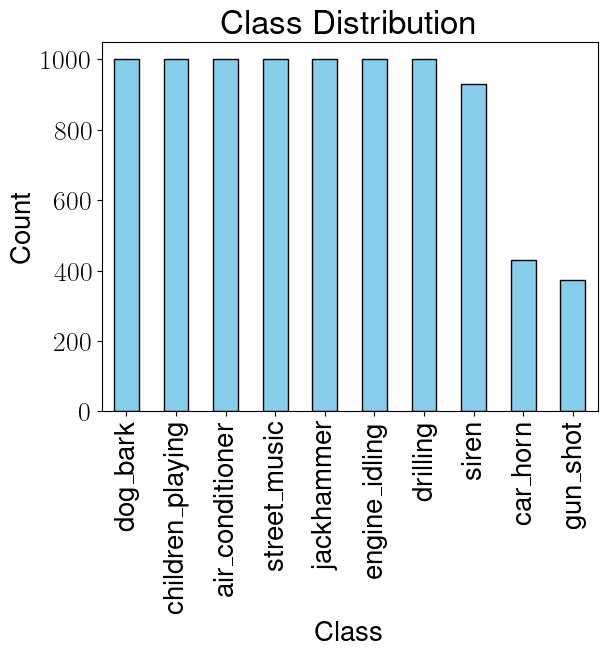

In [4]:
# Plot the class distribution
class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Show the plot
plt.show()

In [5]:
import librosa


# Define a function to calculate the duration of an audio file
def calculate_duration(audio_path):
    try:
        return librosa.get_duration(filename=audio_path)
    except Exception as e:
        print(f"Error calculating duration for {audio_path}: {e}")
        return None

# Add a temporary column with the full audio file path
df['full_audio_path'] = df.apply(lambda row: os.path.join(audio_folder + "/fold" + str(row['fold']), row['slice_file_name']), axis=1)


# Add another temporary column with the audio file duration
df['audio_duration'] = df['full_audio_path'].apply(calculate_duration)

# Display the updated DataFrame
print(df['full_audio_path'])

/tmp/ipykernel_62811/3972079584.py:7: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  return librosa.get_duration(filename=audio_path)


0       /nas/home/fronchini/EUSIPCO/urban-sound-class/...
1       /nas/home/fronchini/EUSIPCO/urban-sound-class/...
2       /nas/home/fronchini/EUSIPCO/urban-sound-class/...
3       /nas/home/fronchini/EUSIPCO/urban-sound-class/...
4       /nas/home/fronchini/EUSIPCO/urban-sound-class/...
                              ...                        
8727    /nas/home/fronchini/EUSIPCO/urban-sound-class/...
8728    /nas/home/fronchini/EUSIPCO/urban-sound-class/...
8729    /nas/home/fronchini/EUSIPCO/urban-sound-class/...
8730    /nas/home/fronchini/EUSIPCO/urban-sound-class/...
8731    /nas/home/fronchini/EUSIPCO/urban-sound-class/...
Name: full_audio_path, Length: 8732, dtype: object


In [6]:
# Specify the path for the new CSV file
new_csv_file_path = metadata_file + "_durations"

# Round the 'audio_duration' column to 3 decimals
df['audio_duration'] = df['audio_duration'].round(3)

# Drop the 'full_audio_path' column before saving
df_to_save = df.drop(columns=['full_audio_path'])


# Save the DataFrame to the new CSV file
df_to_save.to_csv(new_csv_file_path, index=False)

print(f"DataFrame saved to {new_csv_file_path}")

DataFrame saved to /nas/home/fronchini/EUSIPCO/urban-sound-class/UrbanSound8K/metadata/UrbanSound8K.csv_durations


In [7]:
df['audio_duration'].describe()

count    8732.000000
mean        3.607522
std         0.974394
min         0.050000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.037000
Name: audio_duration, dtype: float64

In [8]:
# Assuming your DataFrame is named df
# Group by 'fold' and 'class', then count occurrences
sound_distribution_per_fold = df.groupby(['fold', 'class']).size().reset_index(name='count')


# Save thr sound distirbution per fold to CSV file
class_distribution_per_fold_file_path = os.path.join(dataset_folder, 'class_distribution_per_fold.csv')
sound_distribution_per_fold.to_csv(class_distribution_per_fold_file_path, index=False)


In [9]:
# somma delle distributzioni dei dati
sound_distribution_per_fold.groupby('fold').sum()

,class,count
fold,,
1,air_conditionercar_hornchildren_playingdog_bar...,873
2,air_conditionercar_hornchildren_playingdog_bar...,888
3,air_conditionercar_hornchildren_playingdog_bar...,925
4,air_conditionercar_hornchildren_playingdog_bar...,990
5,air_conditionercar_hornchildren_playingdog_bar...,936
6,air_conditionercar_hornchildren_playingdog_bar...,823
7,air_conditionercar_hornchildren_playingdog_bar...,838
8,air_conditionercar_hornchildren_playingdog_bar...,806
9,air_conditionercar_hornchildren_playingdog_bar...,816


class  air_conditioner  car_horn  children_playing  dog_bark  drilling  \
fold                                                                     
1                  100        36               100       100       100   
2                  100        42               100       100       100   
3                  100        43               100       100       100   
4                  100        59               100       100       100   
5                  100        98               100       100       100   
6                  100        28               100       100       100   
7                  100        28               100       100       100   
8                  100        30               100       100       100   
9                  100        32               100       100       100   
10                 100        33               100       100       100   

class  engine_idling  gun_shot  jackhammer  siren  street_music  
fold                                         

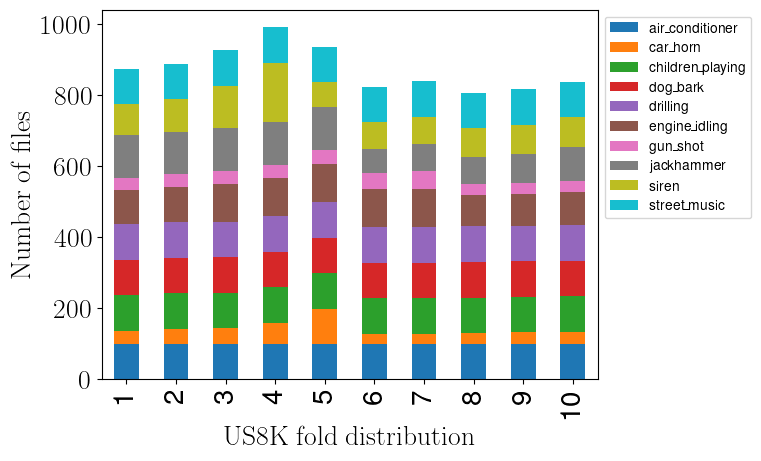

In [22]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Create a pivot table
pivot_table = df.pivot_table(index='fold', columns='class', aggfunc='size', fill_value=0)

# Display the result
print(pivot_table)

# Plot the distribution
pivot_table.plot(kind='bar', stacked=True)
#plt.xlabel('Fold')
plt.xlabel('$\mathrm{US8K~fold~distribution}$')
plt.ylabel('$\mathrm{Number~of~files}$')
#plt.title('Class Distribution by Fold')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
#plt.show()
plt.savefig('/nas/home/fronchini/EUSIPCO/urban-sound-class/class_distribution.pdf', format='pdf', bbox_inches='tight')
